## Question 3

### Question 3.1

In [27]:
import seaborn as sns

from newspaper import Article
import pandas as pd

# List of 10 news URLs
urls = [
    "https://www.theguardian.com/news/2025/sep/24/women-allegedly-abused-by-andrew-tate-decry-misleading-spectator-article",
    "https://www.theguardian.com/us-news/2025/sep/24/first-thing-trump-uses-un-speech-to-attack-global-body-as-feckless-and-pernicious",
    "https://www.theguardian.com/world/2025/sep/24/former-president-peter-mutharika-defeats-incumbent-in-malawi-presidential-election",
    "https://www.theguardian.com/commentisfree/2025/sep/20/journalist-40-years-forces-profession-power",
    "https://www.theguardian.com/uk-news/2025/sep/14/my-conscience-is-clear-prince-harry-on-ukraine-his-family-and-the-media",
    "https://www.theguardian.com/tv-and-radio/2025/sep/18/jimmy-kimmel-suspension-sparks-shock-fears-for-free-speech-censoring-realtime",
    "https://www.aljazeera.com/news/2025/9/25/trump-demands-investigation-over-escalator-teleprompter-sabotage-at-un",
    "https://www.aljazeera.com/news/2025/9/24/russia-says-no-choice-but-war-after-trump-u-turn-on-ukraine",
    "https://www.theguardian.com/technology/2025/sep/20/parents-outraged-meta-uses-photos-schoolgirls-ads-man",
    "https://www.aljazeera.com/news/liveblog/2025/9/23/un-general-assembly-2025-live-day-one"
]

# Function to scrape article using newspaper3k
def scrape_article(url):
    try:
        article = Article(url)
        article.download()
        article.parse()
        return article.title, article.text
    except Exception as e:
        return "Error fetching article", str(e)

#  Loop over URLs and collect data
data = []
for idx, url in enumerate(urls, start=1):
    title, content = scrape_article(url)
    data.append([idx, title, content, url])

# Step 4: Create DataFrame
df = pd.DataFrame(data, columns=["article_id", "article_name", "article_content", "article_url"])

# Save to CSV
df.to_csv("news_articles.csv", index=False)

# Display the first 5 rows
print(df.head())


   article_id                                       article_name  \
0           1  Women allegedly abused by Andrew Tate decry ‘m...   
1           2  First Thing: Trump uses UN speech to attack gl...   
2           3  Malawi’s 85-year-old ex-leader returns to powe...   
3           4  I have now been a journalist for 40 years. The...   
4           5  ‘My conscience is clear’: Prince Harry on Ukra...   

                                     article_content  \
0  Four alleged survivors of sexual abuse by Andr...   
1  Good morning.\n\nDonald Trump took the stage a...   
2  Malawians have voted in an 85-year-old former ...   
3  The BBC I joined on my first day of profession...   
4  It’s about midnight. It’s raining. A small gro...   

                                         article_url  
0  https://www.theguardian.com/news/2025/sep/24/w...  
1  https://www.theguardian.com/us-news/2025/sep/2...  
2  https://www.theguardian.com/world/2025/sep/24/...  
3  https://www.theguardian.com/com

### Question 3.2

In [28]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess(text):
    pattern = r'[^a-zA-Z\s]'
    clean_text= re.sub(pattern, '', text)
    clean_text = clean_text.lower()
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(clean_text)
    filtered_sentence = [word for word in word_tokens if word.lower() not in stop_words]
    clean_text =''.join(filtered_sentence)
    clean_text = ' '.join(filtered_sentence)
    return clean_text

df['clean_text'] = df['article_content'].apply(preprocess)
df.head()
    

,article_id,article_name,article_content,article_url,clean_text
0,1,Women allegedly abused by Andrew Tate decry ‘m...,Four alleged survivors of sexual abuse by Andr...,https://www.theguardian.com/news/2025/sep/24/w...,four alleged survivors sexual abuse andrew tat...
1,2,First Thing: Trump uses UN speech to attack gl...,Good morning.\n\nDonald Trump took the stage a...,https://www.theguardian.com/us-news/2025/sep/2...,good morning donald trump took stage united na...
2,3,Malawi’s 85-year-old ex-leader returns to powe...,Malawians have voted in an 85-year-old former ...,https://www.theguardian.com/world/2025/sep/24/...,malawians voted yearold former leader incumben...
3,4,I have now been a journalist for 40 years. The...,The BBC I joined on my first day of profession...,https://www.theguardian.com/commentisfree/2025...,bbc joined first day professional journalism y...
4,5,‘My conscience is clear’: Prince Harry on Ukra...,It’s about midnight. It’s raining. A small gro...,https://www.theguardian.com/uk-news/2025/sep/1...,midnight raining small group huddled around lo...


In [29]:
# Append polarity
from textblob import TextBlob
df['polarity'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

df.head()

,article_id,article_name,article_content,article_url,clean_text,polarity
0,1,Women allegedly abused by Andrew Tate decry ‘m...,Four alleged survivors of sexual abuse by Andr...,https://www.theguardian.com/news/2025/sep/24/w...,four alleged survivors sexual abuse andrew tat...,-0.048857
1,2,First Thing: Trump uses UN speech to attack gl...,Good morning.\n\nDonald Trump took the stage a...,https://www.theguardian.com/us-news/2025/sep/2...,good morning donald trump took stage united na...,0.036351
2,3,Malawi’s 85-year-old ex-leader returns to powe...,Malawians have voted in an 85-year-old former ...,https://www.theguardian.com/world/2025/sep/24/...,malawians voted yearold former leader incumben...,-0.024663
3,4,I have now been a journalist for 40 years. The...,The BBC I joined on my first day of profession...,https://www.theguardian.com/commentisfree/2025...,bbc joined first day professional journalism y...,0.060820
4,5,‘My conscience is clear’: Prince Harry on Ukra...,It’s about midnight. It’s raining. A small gro...,https://www.theguardian.com/uk-news/2025/sep/1...,midnight raining small group huddled around lo...,0.066018


### Question 3.3

In [30]:
from nltk.tokenize import word_tokenize

# Apply word_tokenize to each row
df['tokens'] = df['clean_text'].apply(lambda x: word_tokenize(str(x)))

print(df['tokens'].head())


0    [four, alleged, survivors, sexual, abuse, andr...
1    [good, morning, donald, trump, took, stage, un...
2    [malawians, voted, yearold, former, leader, in...
3    [bbc, joined, first, day, professional, journa...
4    [midnight, raining, small, group, huddled, aro...
Name: tokens, dtype: object


In [31]:
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stopword_list = set(stopwords.words('english'))

# Flatten the list of token lists into a single list
word_list =  [lemmatizer.lemmatize(word) for tokens in df['tokens'] for word in tokens if word not in stopword_list]

# Lemmatize
lemmatised_words = [lemmatizer.lemmatize(word) for word in word_list]

# Print unique counts
print('Number of unique words before lemmatization:', len(set(word_list)))
print('Number of unique words after lemmatization:', len(set(lemmatised_words)))



Number of unique words before lemmatization: 2382
Number of unique words after lemmatization: 2381


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zinya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
from nltk.corpus import stopwords
stopword_list = stopwords.words('english')
from collections import Counter

clean_word_list = [word for word in lemmatised_words if word not in stopword_list]
bag_of_words = list(set(word_list))
print('Number of unique words',len(bag_of_words), '\n\n', bag_of_words)
word_counts = Counter(word_list)

Number of unique words 2382 

 ['guild', 'meet', 'political', 'closely', 'wintour', 'schooling', 'risk', 'although', 'participant', 'express', 'problem', 'abidjan', 'superhumans', 'politician', 'community', 'change', 'ended', 'strike', 'vance', 'name', 'suspending', 'abc', 'changed', 'reported', 'unready', 'revolt', 'consistently', 'crossposting', 'buffer', 'front', 'online', 'noticed', 'mean', 'swiftly', 'email', 'twothirds', 'discover', 'inflammatory', 'television', 'create', 'evan', 'post', 'narrow', 'prompt', 'dad', 'chief', 'death', 'doreen', 'parent', 'declassified', 'farhan', 'receiving', 'severely', 'sleeper', 'advocacy', 'dissent', 'fund', 'publishing', 'accuse', 'desperately', 'defence', 'strongest', 'vladimir', 'significance', 'gb', 'result', 'traditional', 'grow', 'alasdair', 'weaponised', 'alert', 'answered', 'anonymous', 'working', 'cheered', 'police', 'behind', 'wilfully', 'level', 'occasion', 'pen', 'boasted', 'editor', 'fight', 'crazily', 'pinterest', 'allow', 'attitud

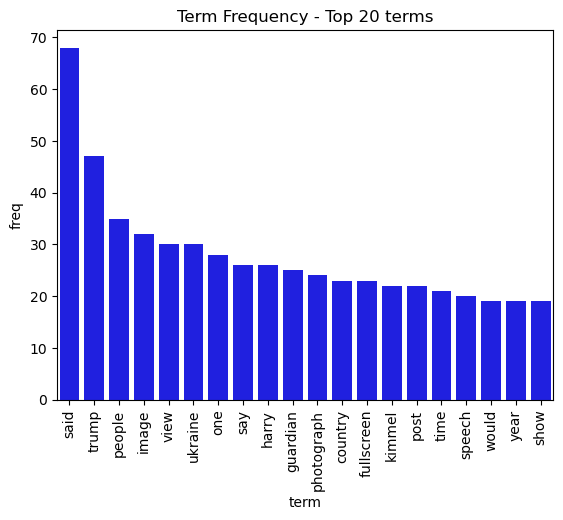

In [33]:
# Create TF DataFrame
import matplotlib.pyplot as plt
tf_vector = [word_counts[word] for word in bag_of_words]
tf_df = pd.DataFrame({'term': bag_of_words, 'freq': tf_vector})
sorted_tf_df = tf_df.sort_values(by='freq', ascending=False).reset_index(drop=True)

# Top 20 terms barplot
TopN = 20
top_tf_df = sorted_tf_df.iloc[0:TopN, :]
ax = sns.barplot(x='term', y='freq', data=top_tf_df, color='blue')
ax.tick_params(axis='x', rotation=90)
plt.title(f'Term Frequency - Top {TopN} terms')
plt.show()

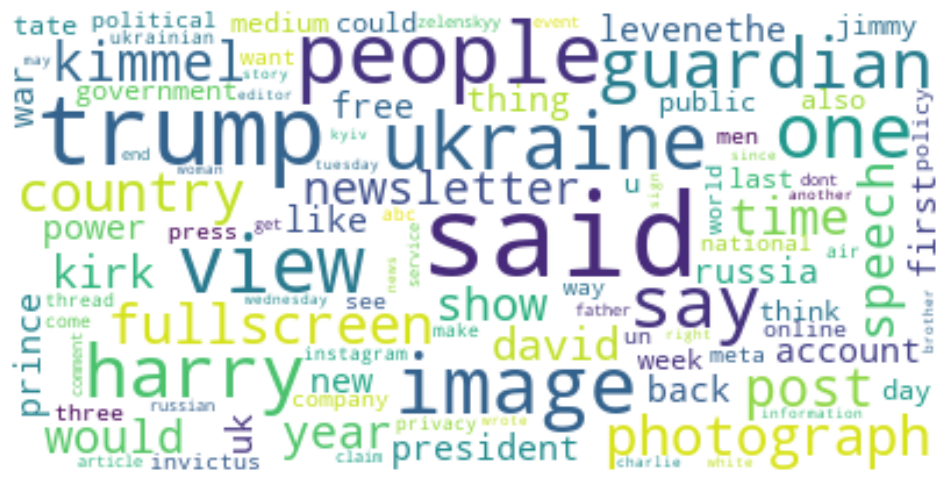

In [34]:
# WordCloud
from wordcloud import WordCloud
word_freq = {tf_df.iloc[i, 0]: tf_df.iloc[i, 1] for i in range(len(bag_of_words))}
wordcloud = WordCloud(max_font_size=50, stopwords=stopword_list, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### QUestion 3.4

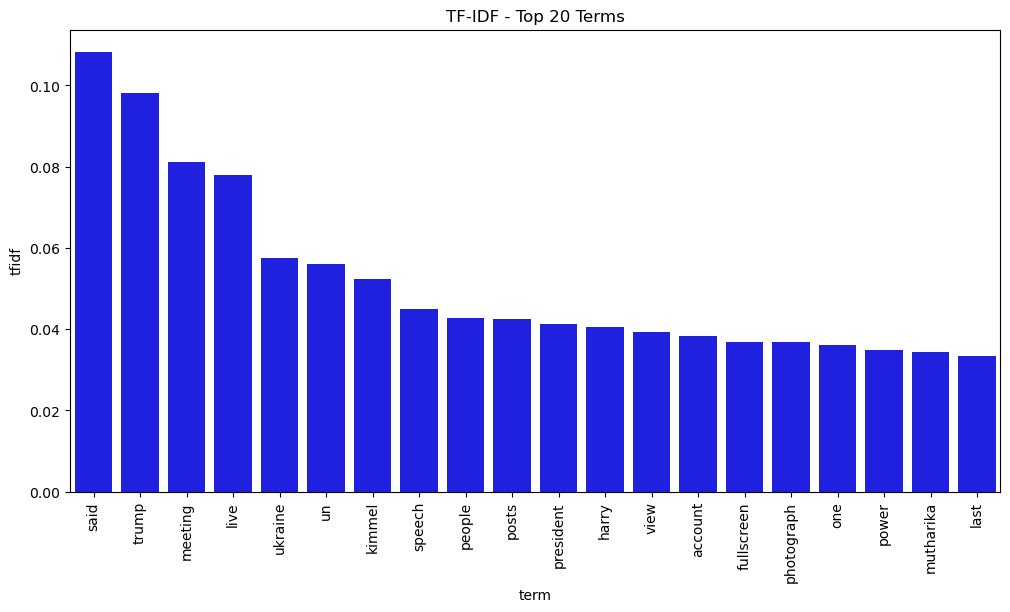

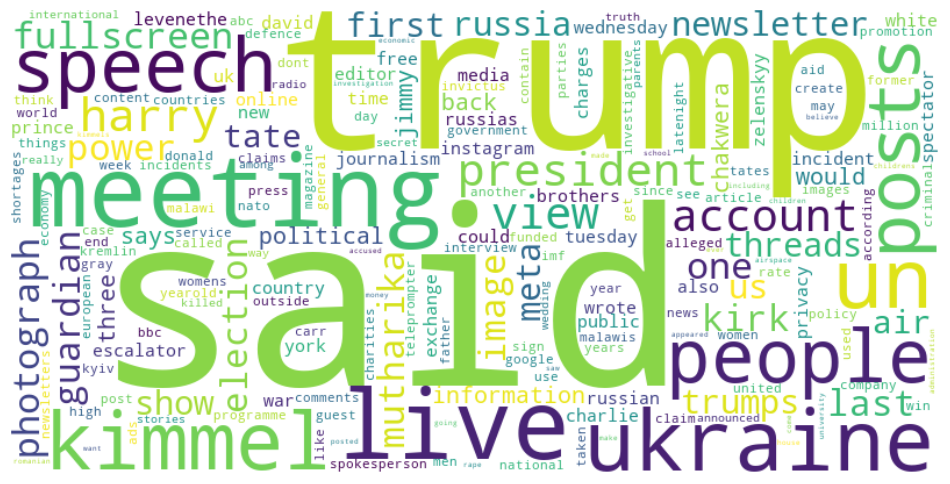

In [35]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

corpus = df['clean_text'].tolist()

# Compute TF-IDF

vectorizer = TfidfVectorizer(max_features=1000)  
tfidf_matrix = vectorizer.fit_transform(corpus)

# Get feature names 
feature_names = vectorizer.get_feature_names_out()

# Compute average TF-IDF for each word across all documents
tfidf_scores = tfidf_matrix.mean(axis=0).A1  
tfidf_df = pd.DataFrame({'term': feature_names, 'tfidf': tfidf_scores})
tfidf_df = tfidf_df.sort_values(by='tfidf', ascending=False).reset_index(drop=True)


# Top 20 words bar plot

TopN = 20
top_tfidf_df = tfidf_df.head(TopN)

plt.figure(figsize=(12,6))
sns.barplot(x='term', y='tfidf', data=top_tfidf_df, color='blue')
plt.xticks(rotation=90)
plt.title(f'TF-IDF - Top {TopN} Terms')
plt.show()


# WordCloud weighted by TF-IDF

word_freq = dict(zip(tfidf_df['term'], tfidf_df['tfidf']))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Question 4

### Question 4.1

In [36]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert corpus to document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(corpus)  # Document-Term Matrix
feature_names = vectorizer.get_feature_names_out()

#  Fit LDA model

num_topics = 4
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)


#  Display topics

def display_topics(model, feature_names, no_top_words):
    topics = {}
    for idx, topic in enumerate(model.components_):
        top_features_idx = topic.argsort()[::-1][:no_top_words]
        top_features = [feature_names[i] for i in top_features_idx]
        topics[f"Topic {idx+1}"] = top_features
    return topics

top_words_per_topic = display_topics(lda, feature_names, 10)  # top 10 words per topic
for topic, words in top_words_per_topic.items():
    print(f"{topic}: {', '.join(words)}")

# Topic distribution for each document

doc_topic_dist = lda.transform(dtm)  
doc_topic_df = pd.DataFrame(doc_topic_dist, columns=[f"Topic {i+1}" for i in range(num_topics)])
doc_topic_df.head()


Topic 1: said, account, newsletter, online, privacy, information, instagram, content, promotion, men
Topic 2: live, meeting, issues, fall, international, forced, investigating, hear, pose, disaster
Topic 3: said, trump, kimmel, speech, president, ukraine, kirk, people, free, jimmy
Topic 4: guardian, view, fullscreen, photograph, image, david, people, says, ukraine, think


,Topic 1,Topic 2,Topic 3,Topic 4
0,0.997057,0.000964,0.000992,0.000987
1,0.000741,0.000711,0.973659,0.024889
2,0.993424,0.002126,0.002244,0.002206
3,0.431652,0.000792,0.000840,0.566716
4,0.000416,0.000407,0.000421,0.998756


### Question 4.2

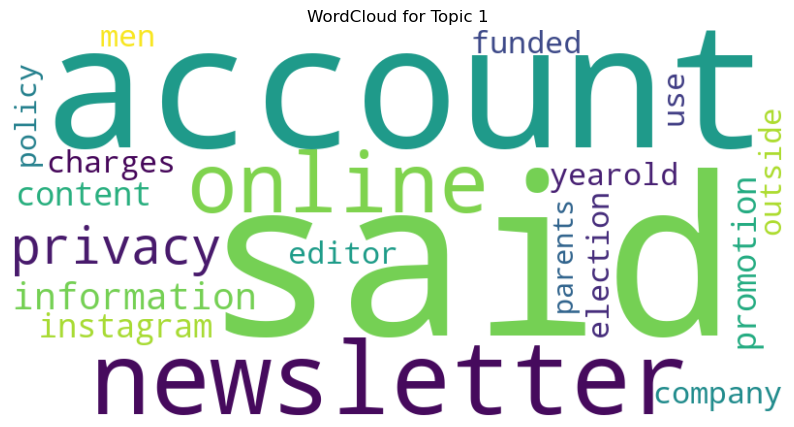

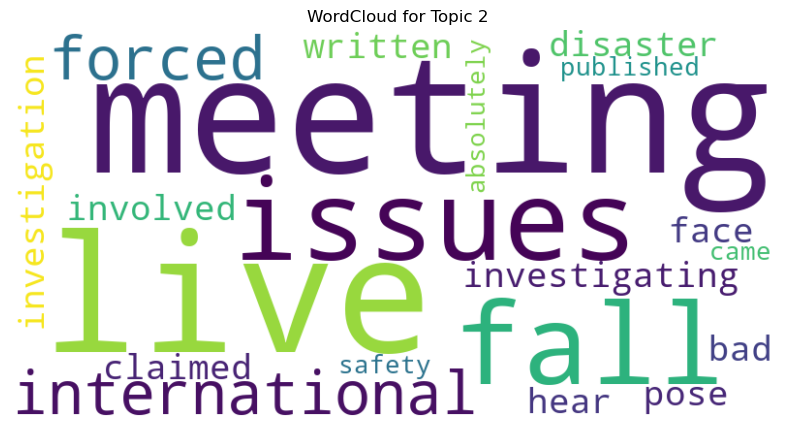

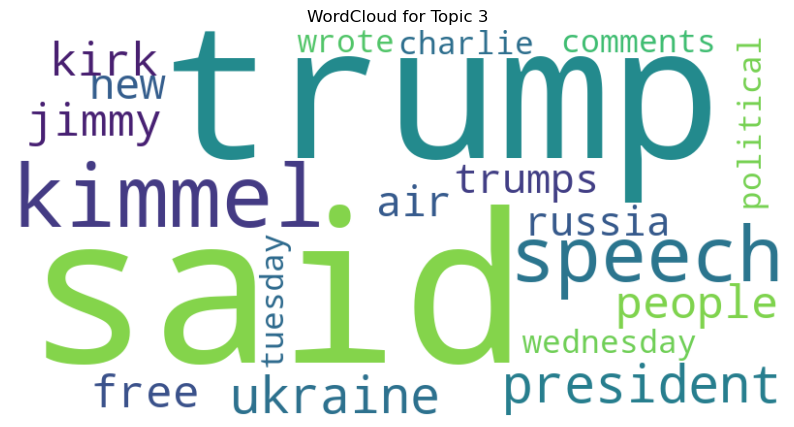

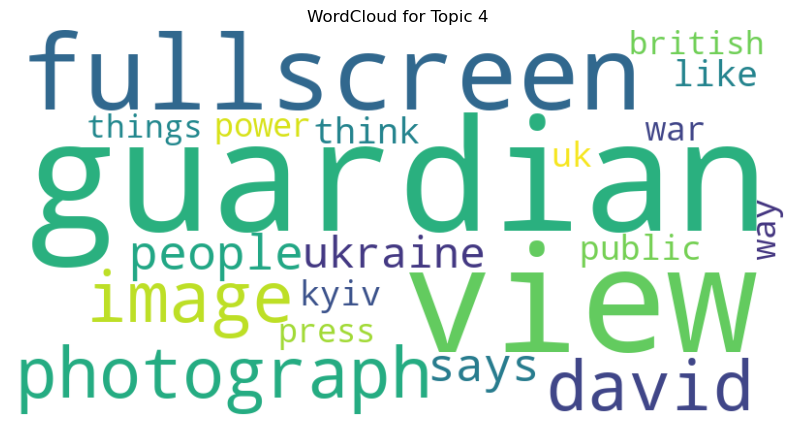

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

num_topics = 4  # same as LDA
num_words = 20  # top words per topic

# Loop through topics
for topic_idx, topic in enumerate(lda.components_):
    # Create a dictionary of {word: weight} for this topic
    word_weights = {feature_names[i]: topic[i] for i in topic.argsort()[::-1][:num_words]}
    
    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_weights)
    
    # Plot
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for Topic {topic_idx+1}")
    plt.show()


### Question 4.3

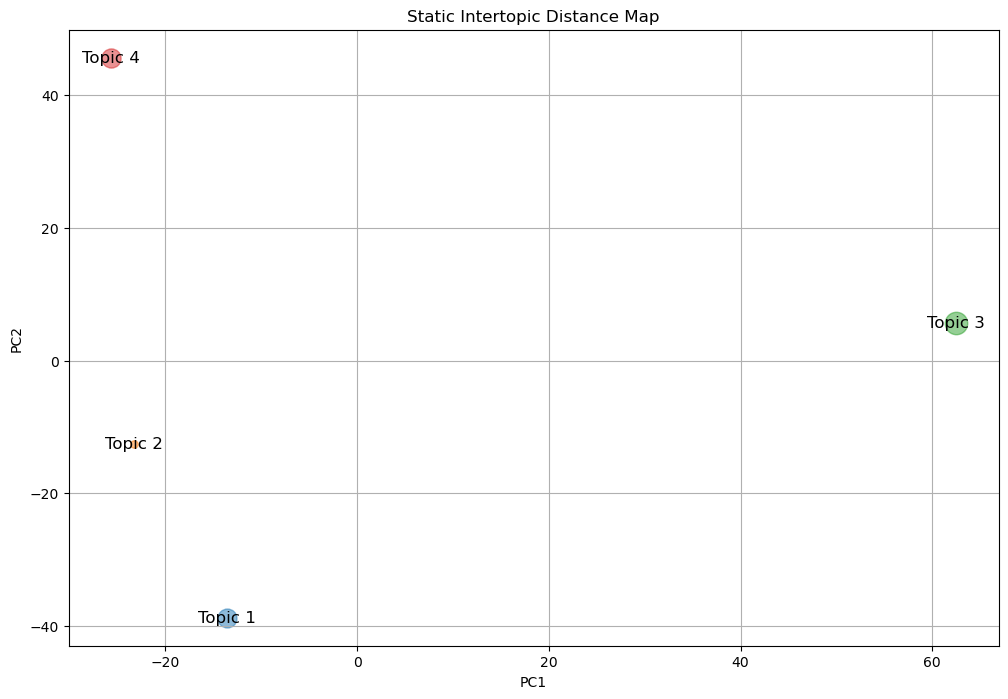

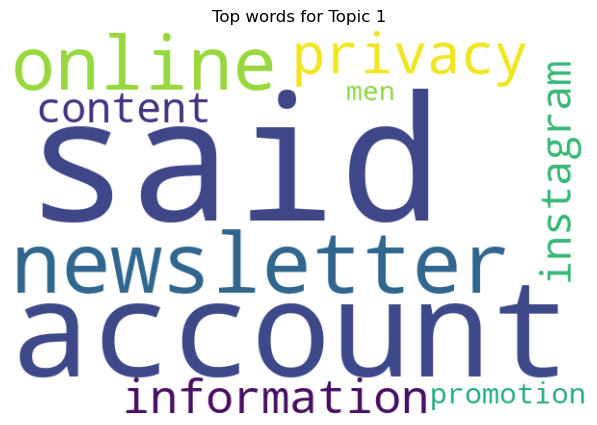

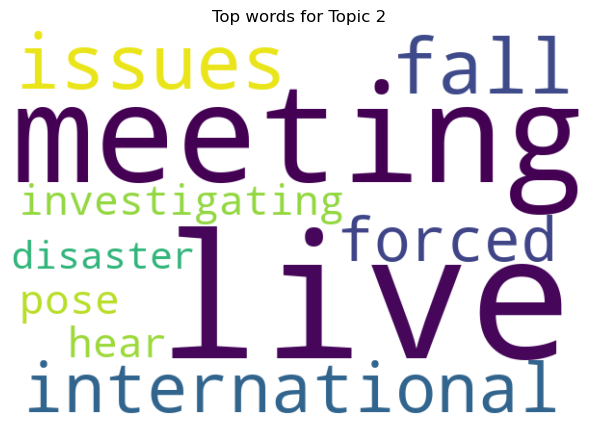

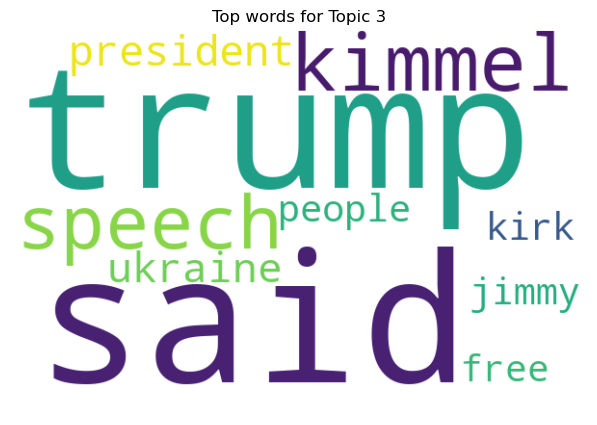

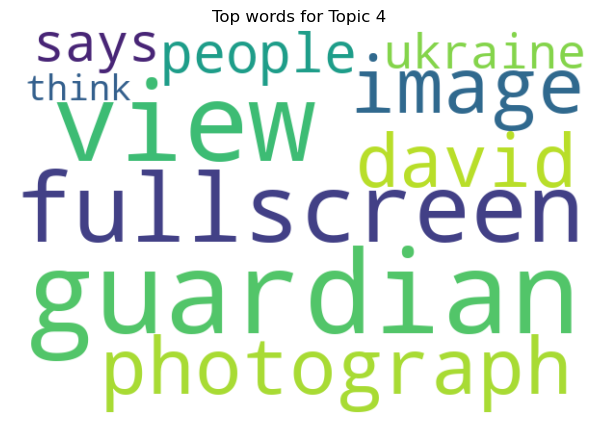

In [38]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from wordcloud import WordCloud

num_topics = 4
num_words = 10

# Reduce topic-word vectors to 2D
topic_vectors = lda.components_
pca = PCA(n_components=2)
topic_coords = pca.fit_transform(topic_vectors)

plt.figure(figsize=(12,8))
for i, coord in enumerate(topic_coords):
    size = np.sum(topic_vectors[i]) / 5000  # scale for visibility
    plt.scatter(coord[0], coord[1], s=size*1000, alpha=0.5)
    plt.text(coord[0], coord[1], f'Topic {i+1}', fontsize=12, ha='center', va='center')

plt.title("Static Intertopic Distance Map")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# WordClouds for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    word_weights = {feature_names[i]: topic[i] for i in topic.argsort()[::-1][:num_words]}
    wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(word_weights)
    
    plt.figure(figsize=(8,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Top words for Topic {topic_idx+1}")
    plt.show()
